In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [9]:
# Replace 'data.csv' with the actual path to your dataset
df = pd.read_csv('x.csv')

# Create an empty list to store the reshaped data
reshaped_data = []

# Iterate through each row in the original dataframe
for index, row in df.iterrows():
    subdivision = row['SUBDIVISION']
    year = row['YEAR']
    
    # Iterate through the columns representing months
    for month in df.columns[2:]:
        year_month = f"{year}-{month.zfill(2)}"
        rainfall = row[month]
        
        # Append the data in the desired format to the reshaped_data list
        reshaped_data.append([subdivision, year_month, rainfall])

# Create a new dataframe using the reshaped_data list
reshaped_df = pd.DataFrame(reshaped_data, columns=['SUBDIVISION', 'YEAR-MONTH', 'RAINFALL'])

# Print the reshaped dataframe
print(reshaped_df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [5]:
import pandas as pd
import numpy as np

# Assuming reshaped_df contains the data in the desired format
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

In [7]:
distinct_values = reshaped_df['SUBDIVISION'].unique()

print("Distinct values:", distinct_values)

Distinct values: ['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


In [232]:
import pandas as pd
import numpy as np

# Assuming reshaped_df contains the data in the desired format
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

# Convert 'YEAR-MONTH' to datetime
reshaped_df_cleaned['YEAR-MONTH'] = pd.to_datetime(reshaped_df_cleaned['YEAR-MONTH'], format='%Y-%b')

# Filter the data for the chosen subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision_data = reshaped_df_cleaned[reshaped_df_cleaned['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS']

# Set 'YEAR-MONTH' as the index for time series analysis
subdivision_data.set_index('YEAR-MONTH', inplace=True)

# Sort the data based on the index (time series data should be sorted chronologically)
subdivision_data.sort_index(inplace=True)


rainfall_data = subdivision_data['RAINFALL']

In [233]:
rainfall_data.tail(10)

YEAR-MONTH
2015-03-01      3.1
2015-04-01    138.2
2015-05-01    331.9
2015-06-01    346.4
2015-07-01    328.9
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='YEAR-MONTH'>

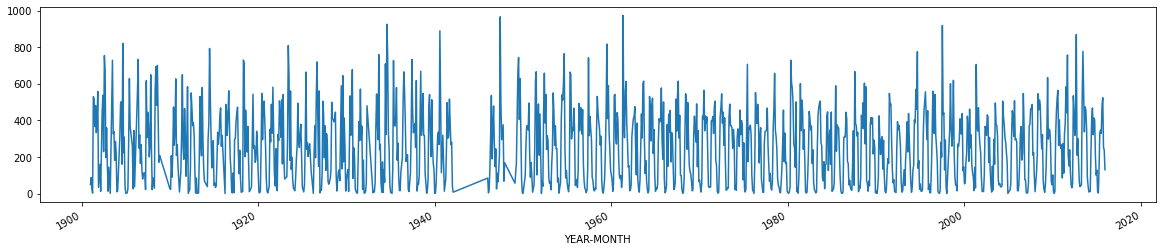

In [234]:
plt.figure(figsize=(20, 4)) 
rainfall_data.plot()

In [235]:
start_date = pd.to_datetime('1901-01-01')
end_date = pd.to_datetime('1950-12-31')

# Boolean indexing to remove the specified range
rainfall_data = rainfall_data[(rainfall_data.index < start_date) | (rainfall_data.index >= end_date)]

print(rainfall_data)

# rainfall_data = rainfall_data.loc['1950-01-01':'2015-12-01'].index

YEAR-MONTH
1951-01-01     82.7
1951-02-01      7.2
1951-04-01     45.4
1951-05-01    259.0
1951-06-01    619.9
              ...  
2015-08-01    480.0
2015-09-01    523.3
2015-10-01    252.1
2015-11-01    236.3
2015-12-01    129.9
Name: RAINFALL, Length: 767, dtype: float64


<AxesSubplot:xlabel='YEAR-MONTH'>

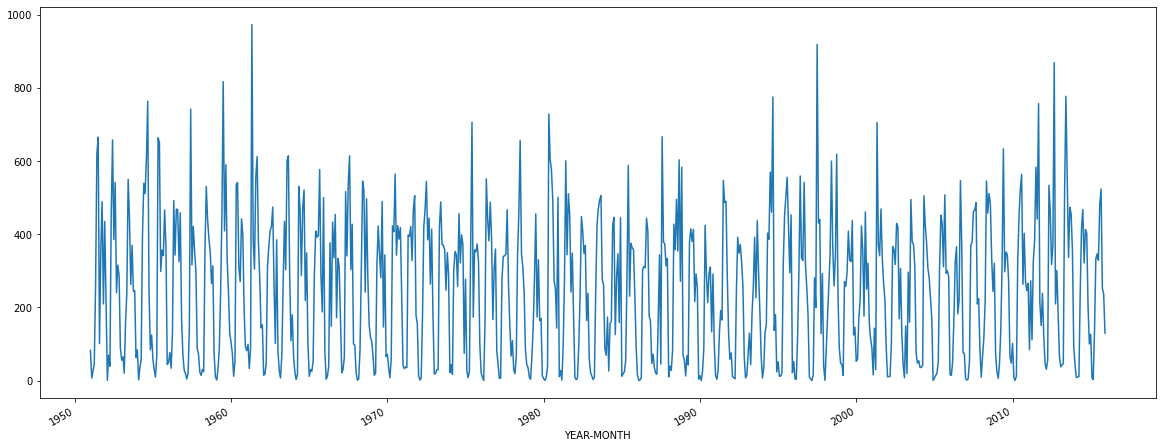

In [236]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

<AxesSubplot:xlabel='YEAR-MONTH'>

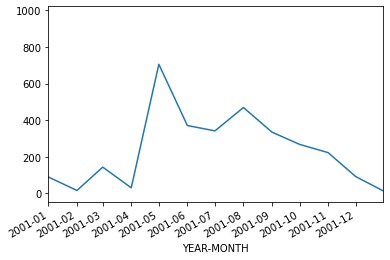

In [237]:
rainfall_data.plot(xlim=['2001-01-01','2001-12-31'])

<AxesSubplot:xlabel='YEAR-MONTH'>

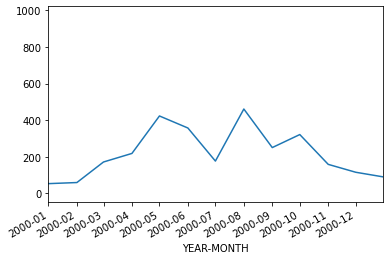

In [238]:
rainfall_data.plot(xlim=['2000-01-01','2000-12-31'])

In [239]:
rainfall_data.index

DatetimeIndex(['1951-01-01', '1951-02-01', '1951-04-01', '1951-05-01',
               '1951-06-01', '1951-07-01', '1951-08-01', '1951-09-01',
               '1951-10-01', '1951-11-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='YEAR-MONTH', length=767, freq=None)

<AxesSubplot:xlabel='YEAR-MONTH'>

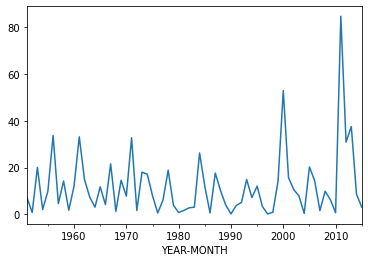

In [240]:
## rule A year end frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.plot()

<AxesSubplot:xlabel='YEAR-MONTH'>

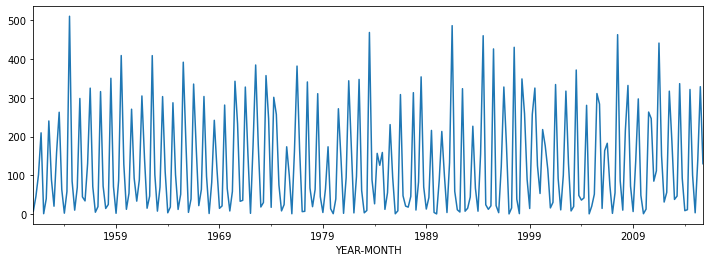

In [241]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
# rainfall_data_min_q.head(20)
rainfall_data_min_q.plot(figsize=(12,4))

<AxesSubplot:xlabel='YEAR-MONTH'>

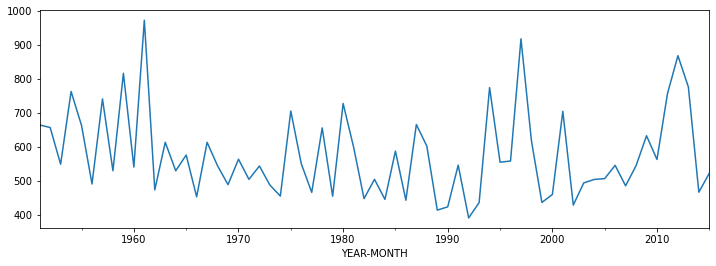

In [242]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.plot(figsize=(12,4))

<AxesSubplot:xlabel='YEAR-MONTH'>

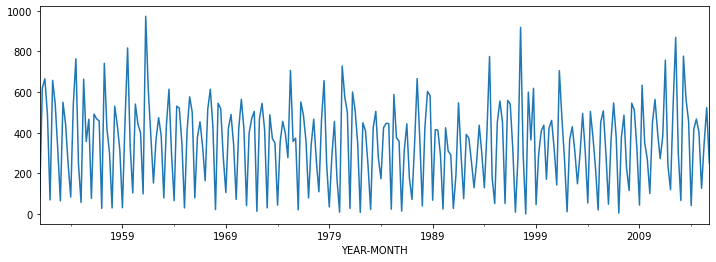

In [243]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.plot(figsize=(12,4))

<AxesSubplot:xlabel='YEAR-MONTH'>

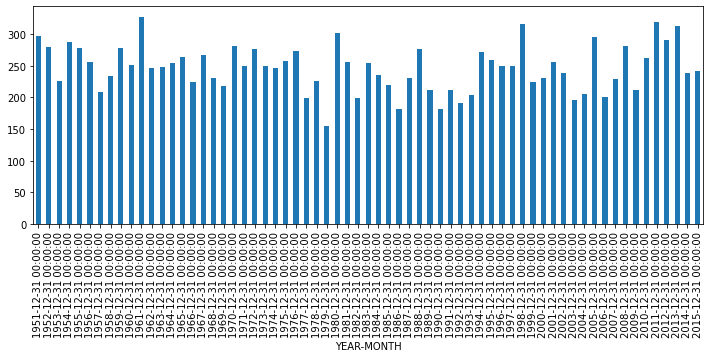

In [244]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [245]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['RAINFALL'].rolling(window=12,min_periods=1).mean()

In [246]:
rainfall_data_r.head()

,RAINFALL,1YR R
YEAR-MONTH,,
1951-01-01,82.7,82.700
1951-02-01,7.2,44.950
1951-04-01,45.4,45.100
1951-05-01,259.0,98.575
1951-06-01,619.9,202.840


<AxesSubplot:xlabel='YEAR-MONTH'>

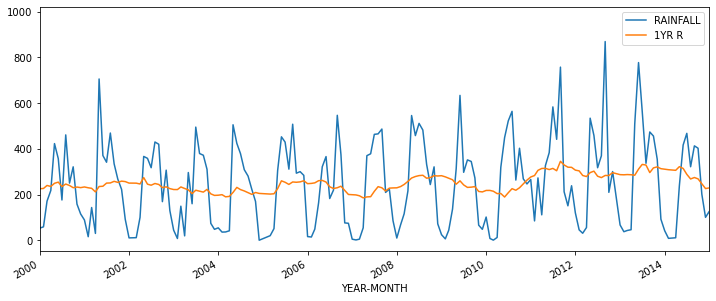

In [247]:
rainfall_data_r[['RAINFALL','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [248]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['RAINFALL'].expanding().mean()

<AxesSubplot:xlabel='YEAR-MONTH'>

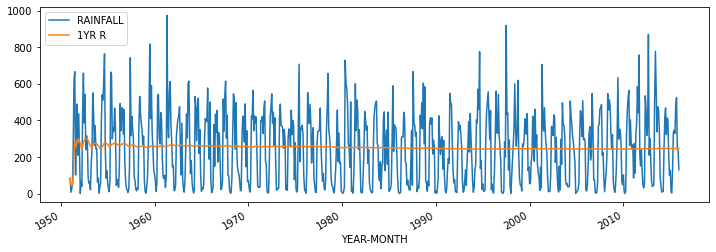

In [249]:
rainfall_data_cr.plot(figsize=(12,4))

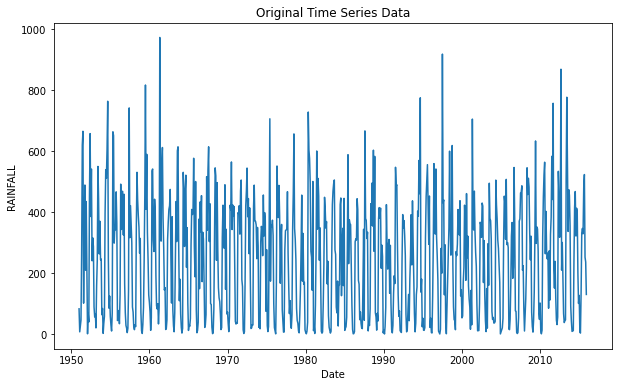

In [250]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['RAINFALL'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('RAINFALL')
plt.show()

In [251]:

# Perform Augmented Dickey-Fuller test
result = adfuller(rainfall_data['RAINFALL'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Test Results:
ADF Statistic: -5.927086069354393
p-value: 2.4293139761758724e-07
Critical Values:
   1%: -3.4390409569041207
   5%: -2.865375732701395
   10%: -2.568812543748081
Reject the null hypothesis. Data is stationary.


In [252]:
# from statsmodels.tsa.stattools import adfuller

# def adf_test(series):
#     result=adfuller(series)
#     print('ADF Statistics: {}'.format(result[0]))
#     print('p- value: {}'.format(result[1]))
#     if result[1] <= 0.05:
#         print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
#     else:
#         print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [253]:
# adf_test(rainfall_data['RAINFALL'])

In [254]:
# rainfall_data['RAINFALL 12 DIFF']=rainfall_data['RAINFALL']-rainfall_data['RAINFALL'].shift(6)
# rainfall_data.head()

In [255]:
# adf_test(rainfall_data['RAINFALL 12 DIFF'].dropna())

<Figure size 1440x1080 with 0 Axes>

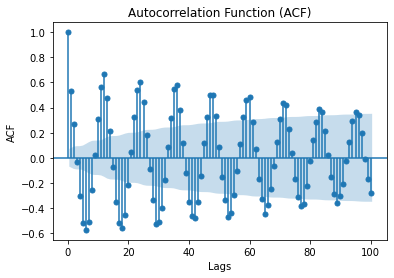

<Figure size 1440x1080 with 0 Axes>

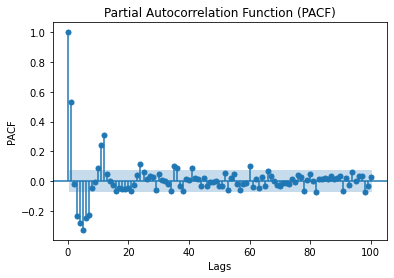

In [256]:

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [257]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [258]:
# acf = plot_acf(rainfall_data["RAINFALL"].dropna())

In [259]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2010,12,1)

In [260]:
train_data=rainfall_data[:train_dataset_end]
test_data=rainfall_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [261]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [262]:
test_data

,RAINFALL
YEAR-MONTH,
2001-01-01,89.0
2001-02-01,15.7
2001-03-01,143.3
2001-04-01,30.1
2001-05-01,705.3
...,...
2010-08-01,563.8
2010-09-01,263.3
2010-10-01,402.4


In [263]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

model_ARIMA=ARIMA(rainfall_data['RAINFALL'],order=(1,0,10))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               RAINFALL   No. Observations:                  767
Model:                    ARMA(1, 10)   Log Likelihood               -4914.903
Method:                       css-mle   S.D. of innovations            146.683
Date:                Wed, 16 Aug 2023   AIC                           9855.806
Time:                        23:20:37   BIC                           9916.158
Sample:                             0   HQIC                          9879.037
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             246.3376      5.692     43.279      0.000     235.182     257.494
ar.L1.RAINFALL      0.7537      0.061     12.335      0.000       0.634       0.873
ma.L1.RAINFALL     -0.4283      0.069     -6.242      0.000      -0.563      -0.294
ma.L2.RAINFALL     -0.1555      0.041     -3.748      0.000      -0.237      -0.074
ma.L3.RAINFALL     -0.1128      0.047     -2.415      0.016      -0.204      -0.021
ma.L4.RAINFALL     -0.0400      0.048     -0.827      0.408      -0.135       0.055
ma.L5.RAINFALL     -0.0934      0.052     -1.809      0.071      -0.195       0.008
ma.L6.RAINFALL     -0.0879      0.041     -2.161      0.031      -0.168      -0.008
ma.L7.RAINFALL     -0.1450      0.056     -2.606      0.009      -0.254      -0.036
ma.L8.RAINFALL      0.0598      0.045      1.317      0.188      -0.029       0.149
ma.L9.RAINFALL      0.0967      0.050      1.945      0.052      -0.001       0.194
ma.L10.RAINFALL     0.1718      0.038      4.538      0.000       0.098       0.246
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.3268           +0.0000j            1.3268            0.0000
MA.1             1.0601           -0.1640j            1.0727           -0.0244
MA.2             1.0601           +0.1640j            1.0727            0.0244
MA.3             0.6622           -0.8910j            1.1101           -0.1483
MA.4             0.6622           +0.8910j            1.1101            0.1483
MA.5            -0.0771           -1.2358j            1.2382           -0.2599
MA.6            -0.0771           +1.2358j            1.2382            0.2599
MA.7            -1.1615           -0.4375j            1.2411           -0.4427
MA.8            -1.1615           +0.4375j            1.2411            0.4427
MA.9            -0.7652           -1.0737j            1.3184           -0.3485
MA.10           -0.7652           +1.0737j            1.3184            0.3485
------------------------------------------------------------------------------
"""

In [264]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2001-01-01 00:00:00
2010-12-01 00:00:00


In [265]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['RAINFALL']-pred

In [266]:
pred

YEAR-MONTH
2001-01-01    171.185654
2001-02-01    198.985763
2001-03-01    162.388504
2001-04-01    223.281098
2001-05-01    177.762317
                 ...    
2010-08-01    397.785937
2010-09-01    414.845216
2010-10-01    296.278230
2010-11-01    304.210310
2010-12-01    172.356988
Length: 117, dtype: float64

In [267]:
residuals

YEAR-MONTH
1951-01-01   NaN
1951-02-01   NaN
1951-04-01   NaN
1951-05-01   NaN
1951-06-01   NaN
              ..
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Length: 767, dtype: float64

<AxesSubplot:ylabel='Density'>

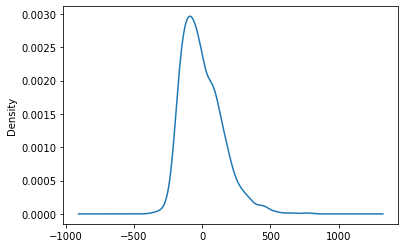

In [268]:
model_Arima_fit.resid.plot(kind='kde')

In [269]:
test_data['Predicted_ARIMA']=pred

C:\Users\ayodh\AppData\Local\Temp/ipykernel_8208/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='YEAR-MONTH'>

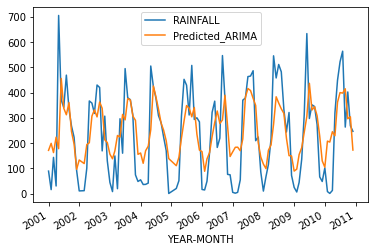

In [270]:
test_data[['RAINFALL','Predicted_ARIMA']].plot()

In [271]:
# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54
# ARIMA Model - Auto ARIMA
# model = sm.tsa.statespace.SARIMAX(rainfall_data, order=(1, 2, 10), seasonal_order=(1, 1, 1, 12))
# results = model.fit()

# # Print the ARIMA model summary
# print(results.summary())

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                       SARIMAX Results                                       
Dep. Variable:                              RAINFALL   No. Observations:                  767
Model:             SARIMAX(1, 2, 10)x(1, 1, [1], 12)   Log Likelihood               -4745.973
Date:                               Wed, 16 Aug 2023   AIC                           9519.947
Time:                                       23:20:51   BIC                           9584.684
Sample:                                            0   HQIC                          9544.886
                                               - 767                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.020    -49.743      0.000      -1.039      -0.961
ma.L1      

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                       
Dep. Variable:                              RAINFALL   No. Observations:                  767
Model:             SARIMAX(1, 0, 10)x(1, 1, [1], 12)   Log Likelihood               -4743.578
Date:                               Wed, 16 Aug 2023   AIC                           9515.155
Time:                                       23:21:24   BIC                           9579.929
Sample:                                            0   HQIC                          9540.106
                                               - 767                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9874      0.024     41.551      0.000       0.941       1.034
ma.L1      

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


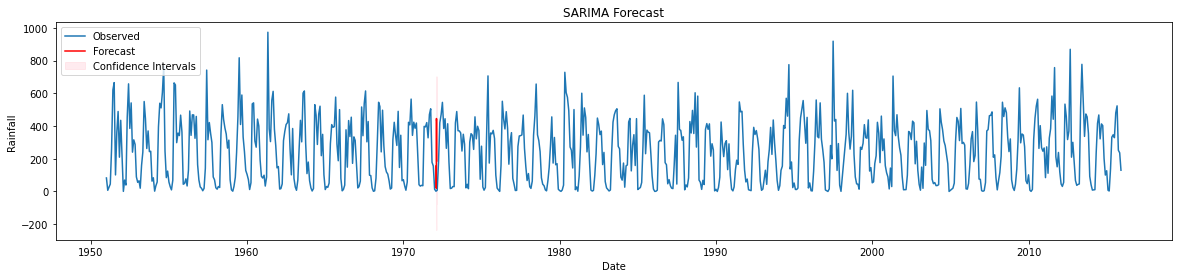

In [273]:
# SARIMA Model - Auto SARIMA
# Replace the values in seasonal_order with appropriate values for your data
# model = sm.tsa.statespace.SARIMAX(rainfall_data, order=(1, 0, 10), seasonal_order=(1, 1, 1, 12))
# results = model.fit()

# # Print the SARIMA model summary
# print(results.summary())

# # Forecasting with SARIMA
# # Forecast 'n' steps ahead
# n_steps = 12  # Change this value as per your requirement
# forecast = results.get_forecast(steps=n_steps)

# # Extract forecasted values and confidence intervals
# forecast_values = forecast.predicted_mean
# confidence_intervals = forecast.conf_int(alpha=0.05)

# # Plot the forecast and confidence intervals
# plt.figure(figsize=(20, 4))
# plt.plot(rainfall_data.index, rainfall_data, label='Observed')
# plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
# plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
# plt.xlabel('Date')
# plt.ylabel('Rainfall')
# plt.title('SARIMA Forecast')
# plt.legend()
# plt.show()


In [276]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_SARIMA=SARIMAX(rainfall_data['RAINFALL'],order=(1,0,10),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ayodh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             RAINFALL   No. Observations:                  767
Model:             SARIMAX(1, 0, 10)x(0, 1, [], 12)   Log Likelihood               -4860.697
Date:                              Wed, 16 Aug 2023   AIC                           9745.394
Time:                                      23:24:19   BIC                           9800.915
Sample:                                           0   HQIC                          9766.781
                                              - 767                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0634      0.926      0.068      0.945      -1.751       1.877
ma.L1         -0.0331      0.927     -0.036      0.971      -1.850       1.784
ma.L2          0.0385      0.046      0.840      0.401      -0.051       0.129
ma.L3          0.0584      0.044      1.316      0.188      -0.029       0.145
ma.L4          0.2246      0.076      2.974      0.003       0.077       0.373
ma.L5         -0.1525      0.218     -0.698      0.485      -0.581       0.276
ma.L6         -0.0520      0.131     -0.396      0.692      -0.309       0.205
ma.L7         -0.1674      0.074     -2.250      0.024      -0.313      -0.022
ma.L8          0.2422      0.162      1.496      0.135      -0.075       0.559
ma.L9          0.0719      0.218      0.330      0.742      -0.356       0.499
ma.L10         0.0376      0.092      0.407      0.684      -0.143       0.218
sigma2      2.289e+04    988.637     23.153      0.000     2.1e+04    2.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                48.29
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.23
Prob(H) (two-sided):                  0.71   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [277]:
test_data.tail()

,RAINFALL,Predicted_ARIMA
YEAR-MONTH,,
2010-08-01,563.8,397.785937
2010-09-01,263.3,414.845216
2010-10-01,402.4,296.278230
2010-11-01,268.5,304.210310
2010-12-01,246.4,172.356988


In [278]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2001-01-01 00:00:00
2010-12-01 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima